In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/Users/chaitanyakakade/Downloads/Heart_Disease_Prediction.csv")
data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [4]:
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [39]:
data['Heart Disease'].isna

<bound method Series.isna of 0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64>

In [5]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

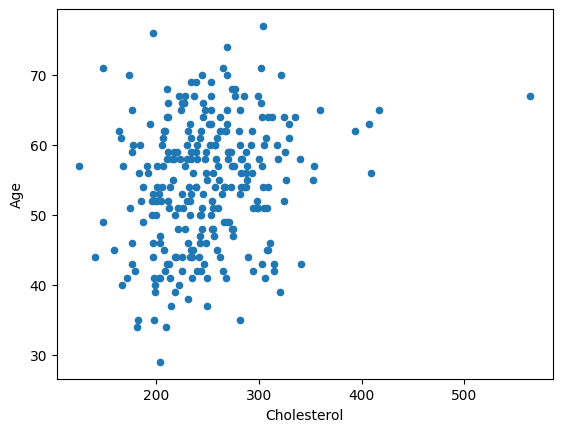

In [6]:
import matplotlib.pyplot as plt
data.plot(kind = 'scatter', x = 'Cholesterol', y = 'Age')

plt.show()

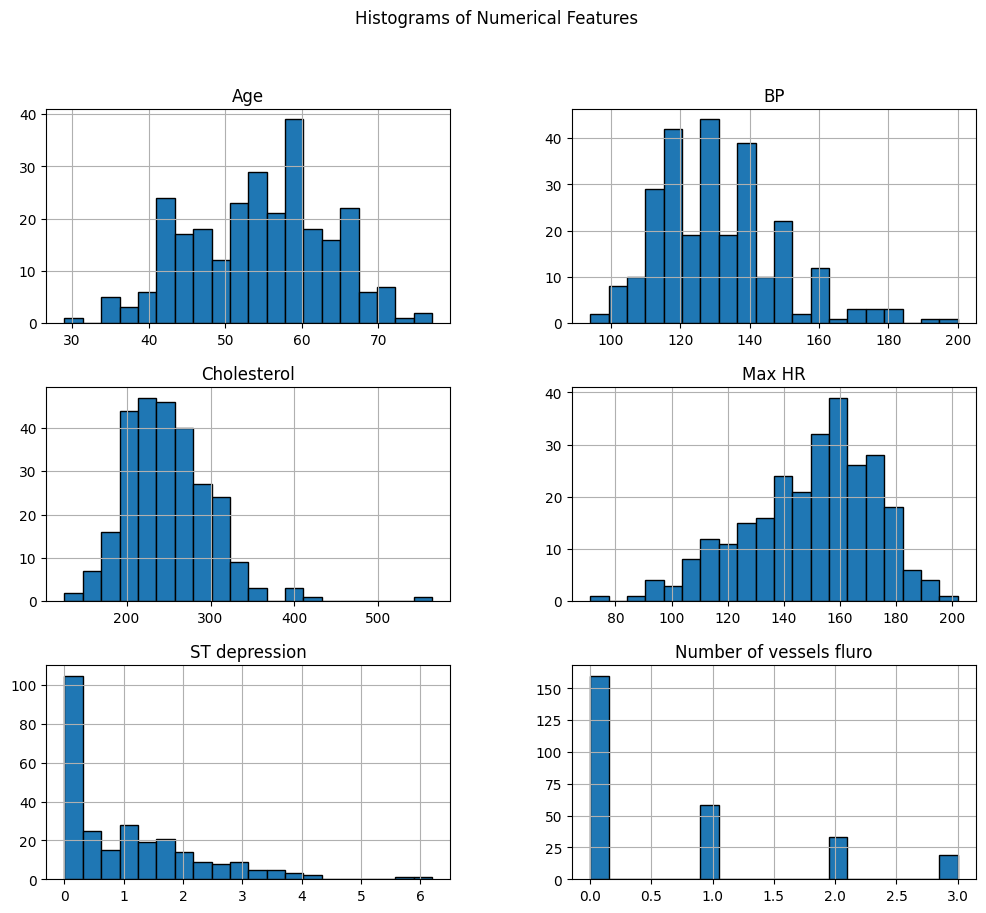

In [7]:

numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']


data[numerical_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [8]:
data .dropna()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


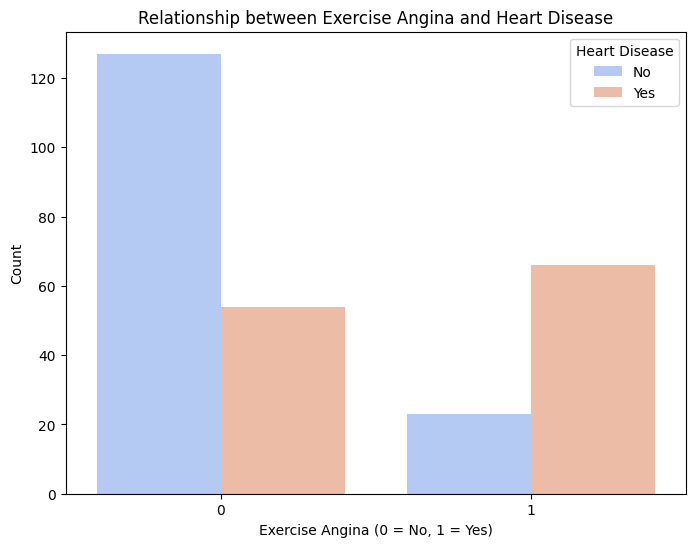

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df=data


label_encoders = {}
for column in ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise angina', hue='Heart Disease', data=df, palette='coolwarm')
plt.title('Relationship between Exercise Angina and Heart Disease')
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


In [10]:
df['Exercise angina'].value_counts()

Exercise angina
0    181
1     89
Name: count, dtype: int64

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder




label_encoders = {}
for column in ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

scaler = StandardScaler()
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


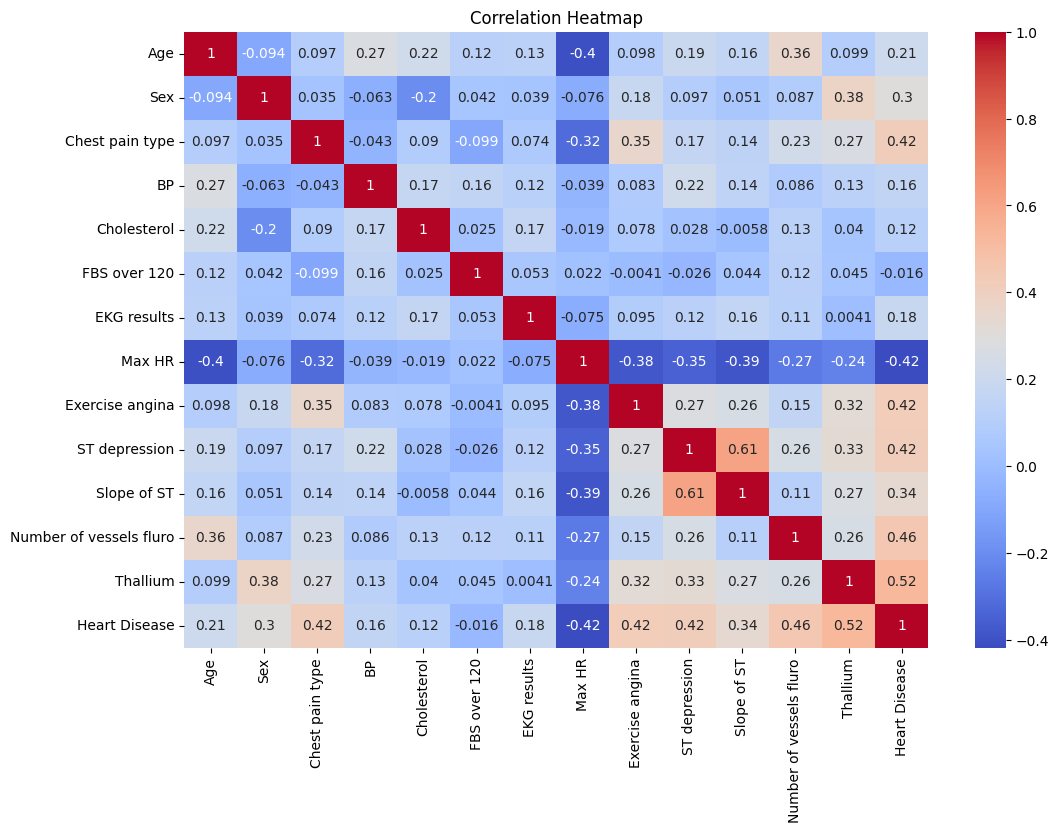

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_preds))




Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



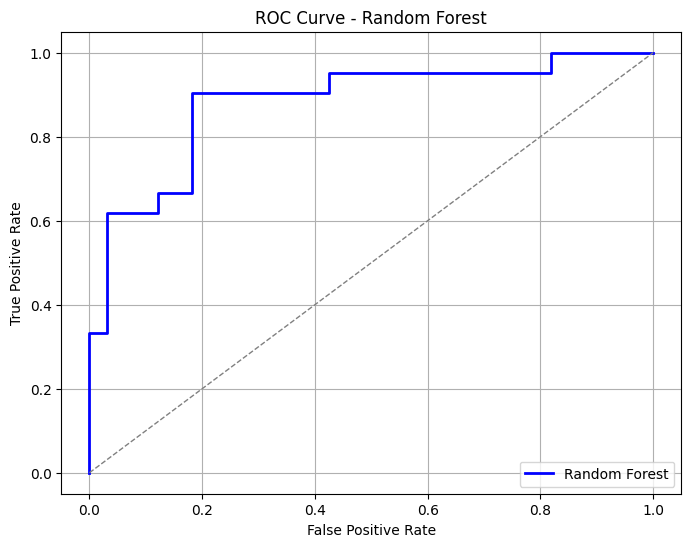

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [15]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print('XGBoost Classification Report:')
print(classification_report(y_test, xgb_preds))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:09:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:


rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f'Random Forest ROC-AUC: {rf_auc}')
print(f'XGBoost ROC-AUC: {xgb_auc}')


Random Forest ROC-AUC: 0.8831168831168831
XGBoost ROC-AUC: 0.8845598845598845


In [18]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.2/455.2 kB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 12.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


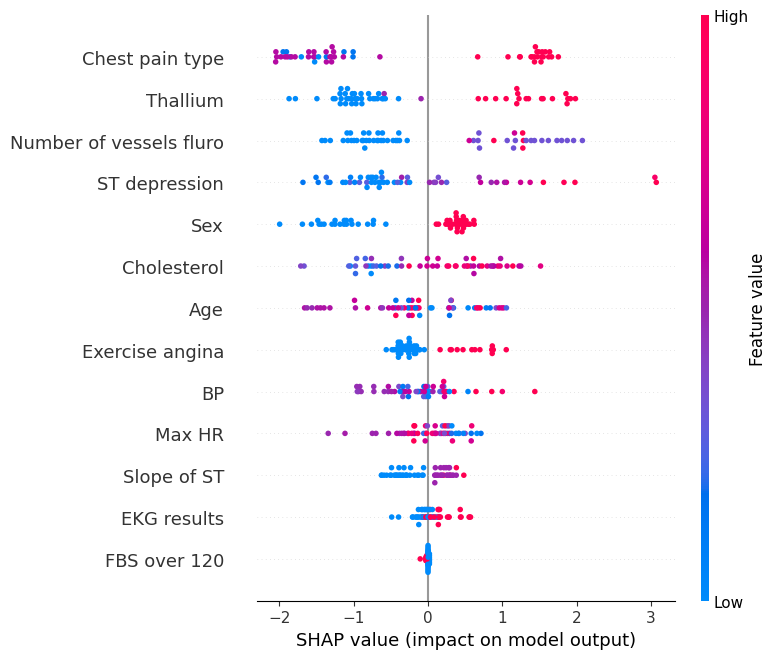

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src

Best parameters found by GridSearchCV: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [19]:

# Step 5: Feature Importance
import shap

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Step 6: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters found by GridSearchCV:', grid_search.best_params_)


In [20]:

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
], voting='soft')

ensemble_model.fit(X_train, y_train)
ensemble_preds = ensemble_model.predict(X_test)
print('Ensemble Model Classification Report:')
print(classification_report(y_test, ensemble_preds))

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:13:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
df.head

<bound method NDFrame.head of           Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    1.712094    1                3 -0.075410     1.402212             0   
1    1.382140    0                2 -0.916759     6.093004             0   
2    0.282294    1                1 -0.411950     0.219823             0   
3    1.052186    1                3 -0.187590     0.258589             0   
4    2.152032    0                1 -0.636310     0.374890             0   
..        ...  ...              ...       ...          ...           ...   
265 -0.267629    1                2  2.280369    -0.981951             1   
266 -1.147506    1                1 -0.636310     0.258589             0   
267  0.172309    0                1  0.485490     0.859476             0   
268  0.282294    1                3  0.485490    -1.117635             0   
269  1.382140    1                3  1.607289     0.704409             0   

     EKG results    Max HR  Exercise angina  ST depressio

In [25]:
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

In [27]:
X=data.drop('Heart Disease', axis=1)

y=data['Heart Disease']

In [30]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.4 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [32]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,1,3,-0.075410,1.402212,0,2,-1.759208,0,1.181012,1,2.472682,0
1,1.382140,0,2,-0.916759,6.093004,0,2,0.446409,0,0.481153,1,-0.711535,2
2,0.282294,1,1,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,0,-0.711535,2
3,1.052186,1,3,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,1,0.349871,2
4,2.152032,0,1,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,0,0.349871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,2,2.280369,-0.981951,1,0,0.532904,0,-0.481153,0,-0.711535,2
266,-1.147506,1,1,-0.636310,0.258589,0,0,1.008625,0,-0.918565,0,-0.711535,2
267,0.172309,0,1,0.485490,0.859476,0,2,0.143677,0,0.218706,1,-0.711535,0
268,0.282294,1,3,0.485490,-1.117635,0,0,-0.072560,0,-0.568636,1,-0.711535,1


In [33]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [34]:
X

array([[0.85416667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.        ,
        0.5       ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
y_train.shape

(216,)

In [40]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [41]:
y_train.value_counts()

Heart Disease
0    120
1    120
Name: count, dtype: int64

In [42]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
    
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

In [43]:
model_RFC = RandomForestClassifier()

In [44]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 40}
accuracy : 0.9305555555555556


RandomForestClassifier(max_depth=7, n_estimators=20)
Accuracy :  0.85 Recall :  0.8387096774193549 F1 :  0.8524590163934426


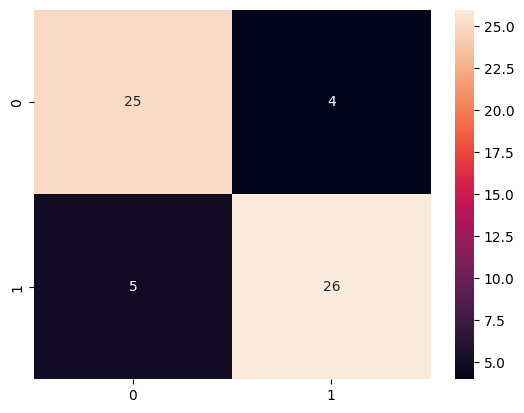

In [56]:
rf = RandomForestClassifier(max_depth=7, n_estimators=20)


evaluate(rf)